In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lidar_data_analyzer import LidarDataSet
# import lidar_data_analyzer

In [ ]:
## Entire dataset

In [2]:
data_segment_filenames = [[f"TM1_{x}_{y}" for y in range(80,84+1)] for x in range(442,447+1)]
lds = LidarDataSet.from_array_of_csv_files(data_segment_filenames, filename_prefix="./data/dataset2/")

PLOTTING


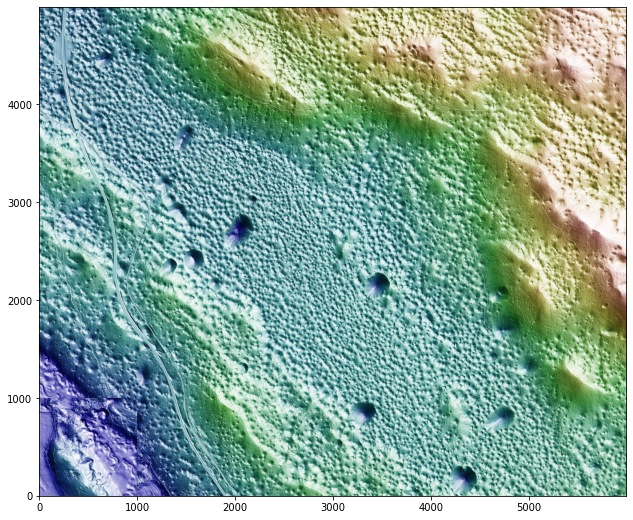

In [3]:
lds.plot(fig_size=(12,9))

In [ ]:
## Rotated dataset

It's the same dataset, but rotated by 45 degrees. We want to extract possibly largest rectangular subsets from the large dataset and it's easier if we rotate it.

In [4]:
from scipy.ndimage import rotate
lds_r = LidarDataSet(rotate(lds.dataset, 45, reshape=False))

PLOTTING


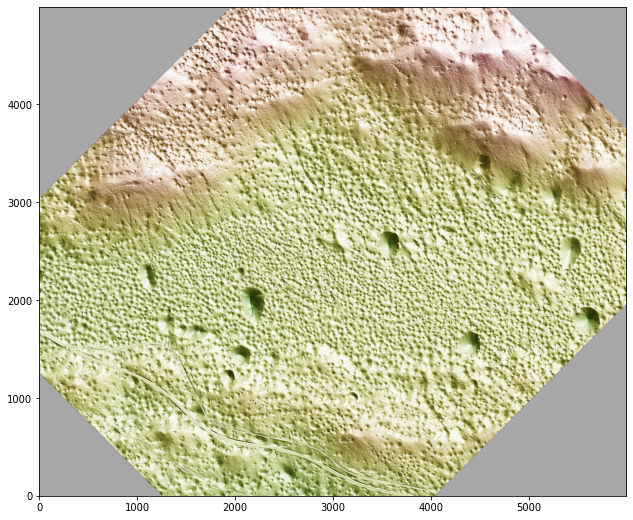

In [5]:
lds_r.plot(fig_size=(12,9))

## Rectangular subsets from the rotated dataset

PLOTTING


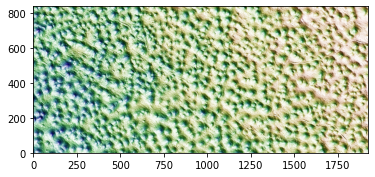

PLOTTING


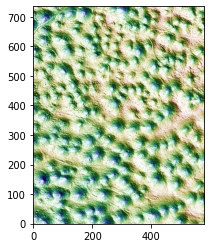

PLOTTING


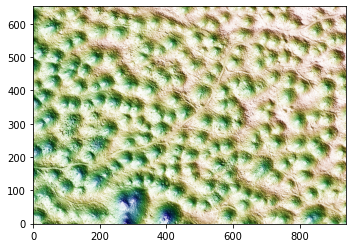

In [6]:
subsets = [[2309, 4232, 1573, 2414], #duży obszar
           #[2309, 4783, 1684, 2414],
            [1396, 1975, 1774, 2510],
            [  48,  987, 1700, 2353]]

# [2309, 4783, 1684, 2414], # duży obszar -- rozszerzenie w prawo (z obciętym z dołu)
# [2309, 4803, 1573, 2917],# rozszerzenie włączające duży lej -> mniej klarowne ale podobne maksima

lds_subsets = []

for i, subset_i in enumerate(subsets):

    minx, maxx, miny, maxy = subset_i
    lds_subsets.append(LidarDataSet.from_rectangular_subset(lds_r, minx, maxx, miny, maxy))

for s in lds_subsets:
    s.plot()

